In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
torch.manual_seed(1)

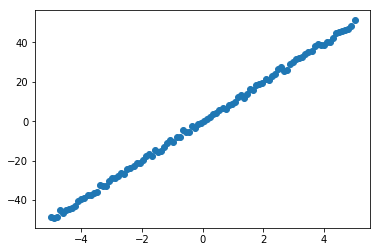

In [19]:
x = torch.unsqueeze(torch.linspace(5,-5,100),1)
y =  10 * x+ 0.8 * torch.randn(x.size())
plt.scatter(x,y)
plt.show()

In [20]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [21]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-3)

In [22]:
num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
    
    out = model(inputs)
    loss = criterion(out, target)
    
    opterizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if (epoch+1) % 20 == 0:
        print('Epoch [{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.item()))

Epoch [20/1000],loss:512.522888
Epoch [40/1000],loss:137.573334
Epoch [60/1000],loss:6.954600
Epoch [80/1000],loss:254.706390
Epoch [100/1000],loss:625.981995
Epoch [120/1000],loss:739.222778
Epoch [140/1000],loss:477.838348
Epoch [160/1000],loss:110.409378
Epoch [180/1000],loss:15.086708
Epoch [200/1000],loss:290.081512
Epoch [220/1000],loss:652.243408
Epoch [240/1000],loss:729.034668
Epoch [260/1000],loss:441.791748
Epoch [280/1000],loss:85.855049
Epoch [300/1000],loss:27.048851
Epoch [320/1000],loss:326.080414
Epoch [340/1000],loss:675.559143
Epoch [360/1000],loss:715.728882
Epoch [380/1000],loss:405.224365
Epoch [400/1000],loss:63.735401
Epoch [420/1000],loss:42.411324
Epoch [440/1000],loss:362.903412
Epoch [460/1000],loss:695.781189
Epoch [480/1000],loss:698.852783
Epoch [500/1000],loss:368.664520
Epoch [520/1000],loss:44.769726
Epoch [540/1000],loss:60.631737
Epoch [560/1000],loss:399.859100
Epoch [580/1000],loss:713.251221
Epoch [600/1000],loss:678.669373
Epoch [620/1000],loss:3

In [1]:
model.eval()

NameError: name 'model' is not defined

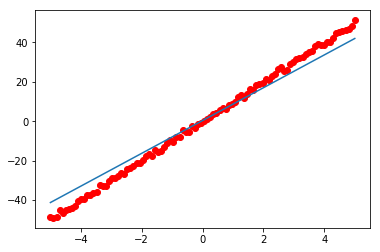

In [23]:
model.eval()
predict = model(Variable(x))
predict = predict.data.numpy()
plt.plot(x.numpy(),y.numpy(),'ro',label = 'Original data')
plt.plot(x.numpy(),predict,label = 'Fitting Line')
plt.show()